# Step 1: Split the dataset into training and testing sets.

In [26]:
# read audio files
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt

angry_audio_folder = 'angry'
angry_audio_files = os.listdir(angry_audio_folder)[:100] # Gets first 100 angry audio files
angry_data = []
for angry_audio_file in angry_audio_files:
    audio_path = os.path.join(angry_audio_folder, angry_audio_file)
    y, sr = librosa.load(audio_path, sr=None)
    temp = [y, sr]
    angry_data.append(temp)

fear_audio_folder = 'fear'
fear_audio_files = os.listdir(fear_audio_folder)[:100] # Gets first 100 fear audio files
fear_data = []
for angry_audio_file in angry_audio_files:
    audio_path = os.path.join(angry_audio_folder, angry_audio_file)
    y, sr = librosa.load(audio_path, sr=None)
    temp = [y, sr]
    fear_data.append(temp)

happy_audio_folder = 'happy'
happy_audio_files = os.listdir(happy_audio_folder)[:100] # Gets first 100 happy audio files
happy_data = []
for angry_audio_file in angry_audio_files:
    audio_path = os.path.join(angry_audio_folder, angry_audio_file)
    y, sr = librosa.load(audio_path, sr=None)
    temp = [y, sr]
    happy_data.append(temp)

sad_audio_folder = 'sad'
sad_audio_files = os.listdir(sad_audio_folder)[:100] # Gets first 100 sad audio files
sad_data = []
for angry_audio_file in angry_audio_files:
    audio_path = os.path.join(angry_audio_folder, angry_audio_file)
    y, sr = librosa.load(audio_path, sr=None)
    temp = [y, sr]
    sad_data.append(temp)


In [59]:
from sklearn.model_selection import train_test_split

# Create a list of labels for each audio file
angry_labels = [0] * len(angry_data) # 0 = angry
fear_labels = [1] * len(fear_data) # 1 = fear
happy_labels = [2] * len(happy_data) # 2 = happy
sad_labels = [3] * len(sad_data) # 3 = sad

# Concatenate all the data and labels
X = np.concatenate((angry_data, fear_data, happy_data, sad_data))
y = np.concatenate((angry_labels, fear_labels, happy_labels, sad_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X.shape)

(400, 2)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [16]:
# import pandas as pd

# angry_data = np.array(angry_data)
# angry_df = pd.DataFrame(angry_data)
# print(angry_df.head(5))

                                                   0
0  [0.0, -6.1035156e-05, -0.0002746582, -9.155273...
1  [-3.0517578e-05, 0.0, 0.00024414062, 0.0001220...
2  [3.0517578e-05, 0.0005493164, -3.0517578e-05, ...
3  [0.000579834, 0.0012817383, 0.00045776367, 0.0...
4  [0.00021362305, 0.00012207031, -0.00030517578,...


# Step 2: Exploratory Data Analysis.

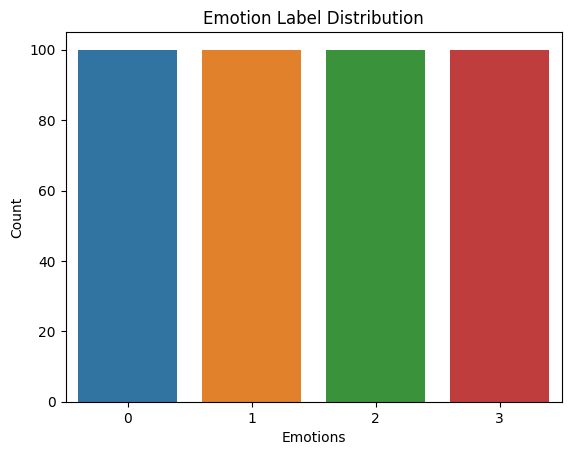

In [61]:
# label distribution
import seaborn as sns

sns.countplot(x=y)
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Emotion Label Distribution")
plt.show()


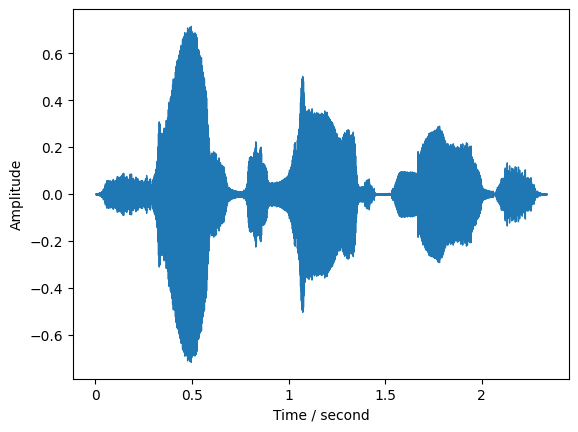

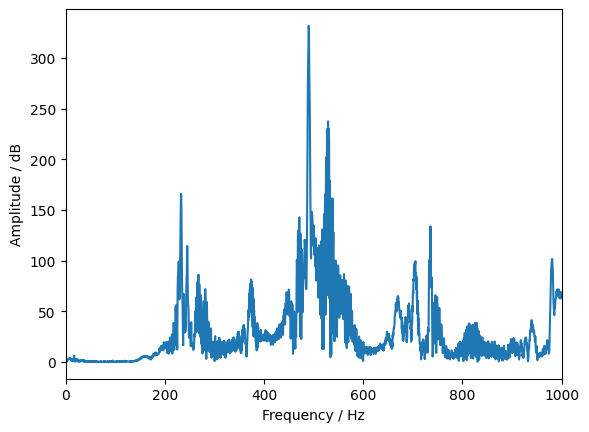

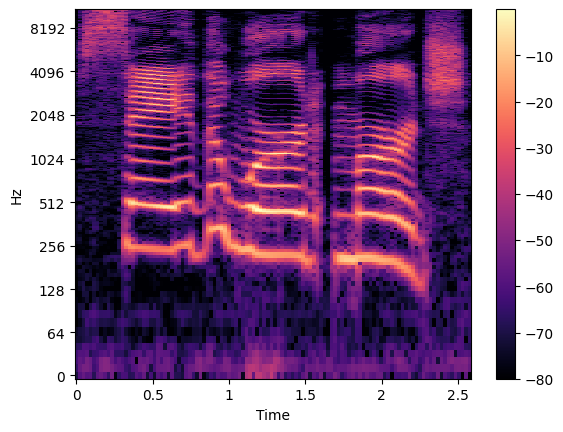

In [63]:
# select one audio file
signal = X[0][0]
sample_rate = X[0][1]

# following code from Professor Ma's extract_audio_features.py example
# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

# plot the time-frequency variation of the audio
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

# Step 3: Acoustic Feature Extraction.

In [122]:
import pandas as pd

feature_matrix = pd.DataFrame()
df_loudness = []
df_mfccs = []
df_zcr = []
df_chroma = []
df_mel_spectrogram =[]

for i, sample in enumerate(X_train):
    signal = sample[0]
    sample_rate = sample[1]

    # audio feature extraction: loudness
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    # print(i, rms[0])
    df_loudness.append(rms[0])

    # audio feature extraction: mel-frequency cepstral coefficients
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    temp = []
    for n_mfcc in range(len(mfccs)):
        temp.append(mfccs.T[n_mfcc])
    df_mfccs.append(temp)

    # audio feature extraction: zero-crossing rate
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zcr.append(zcr[0])

    # audio feature extraction: chroma
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    temp = []
    for n_chroma in range(len(chromagram)):
        temp.append(chromagram.T[n_chroma])
    df_chroma.append(temp)

    # audio feature extraction: mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    temp = []
    for n_mel in range(len(mel_spectrogram)):
        temp.append(mel_spectrogram.T[n_mel])
    df_mel_spectrogram.append(temp)


feature_matrix['Loudness'] = df_loudness
feature_matrix['MFCCs'] = df_mfccs
feature_matrix['Zero_Crossing_Rate'] = df_zcr
feature_matrix['Chroma'] = df_chroma
feature_matrix['Mel_Spectrogram'] = df_mel_spectrogram
print(feature_matrix)
    

                                              Loudness   
0    [0.0010489814372498967, 0.004455436376411797, ...  \
1    [0.001084826070969988, 0.004027028897301486, 0...   
2    [0.0013242415212125938, 0.005693100834749805, ...   
3    [0.001036921953449914, 0.004120878918031814, 0...   
4    [0.0011264618596964762, 0.0045468365098176805,...   
..                                                 ...   
275  [0.0009013947190614875, 0.003700617399003061, ...   
276  [0.0013234723346154614, 0.006278727492269902, ...   
277  [0.0007543877306958801, 0.0038404527478940018,...   
278  [0.0019595282891999135, 0.008018943254985202, ...   
279  [0.0019229925664886673, 0.006628046927684017, ...   

                                                 MFCCs   
0    [[-490.5194, -38.22017, 4.7048025, 36.940514, ...  \
1    [[-487.65363, -36.025738, 22.131426, 27.43515,...   
2    [[-472.5758, -48.493492, 8.024218, 38.63906, -...   
3    [[-526.2823, -62.668724, 32.080288, 34.43184, ...   
4    [[-473.3

In [ ]:
# import pandas as pd

# feature_matrix = pd.DataFrame()

# for i, sample in enumerate(X_train):
#     signal = sample[0]
#     sample_rate = sample[1]

#     # audio feature extraction: loudness
#     df_loudness = pd.DataFrame()
#     S, phase = librosa.magphase(librosa.stft(signal))
#     rms = librosa.feature.rms(S=S)
#     df_loudness['Loudness'] = rms[0]

    # # audio feature extraction: mel-frequency cepstral coefficients
    # df_mfccs = pd.DataFrame()
    # mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    # for n_mfcc in range(len(mfccs)):
    #     df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]

    # # audio feature extraction: zero-crossing rate
    # df_zcr = pd.DataFrame()
    # zcr = librosa.feature.zero_crossing_rate(y=signal)
    # df_zcr['Zero_Crossing_Rate'] = zcr[0]

    # # audio feature extraction: chroma
    # df_chroma = pd.DataFrame()
    # chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    # for n_chroma in range(len(chromagram)):
    #     df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]

    # # audio feature extraction: mel spectrogram
    # df_mel_spectrogram = pd.DataFrame()
    # mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    # for n_mel in range(len(mel_spectrogram)):
    #     df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]


# # combine all features
# feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
# print(feature_matrix.head(5))
# feature_matrix.to_csv('feature_matrix.csv')

# Step 4: Feature Post-processing.

In [124]:
# create time windows


# feature matrix scaling


# feature matrix concatenation


# feature matrix averaging



# Step 5: Build your audio emotion recognition model. 

# Step 6: Model evaluation.